In [1]:
import json
import matplotlib.pyplot as plt
import os
import statistics
import numpy as np

In [2]:
# load annotation files
#label_root = "../data/maritime_dataset/labels/"
label_root = "../data/maritime_dataset/labels/"

label_path = "training_labels_animals.json"
with open(os.path.join(label_root, label_path) , 'r') as f:
    train_labels_animals = json.load(f)
    
label_path = "test_labels.json"
with open(os.path.join(label_root, label_path), 'r') as f:
    test_labels = json.load(f)
    
label_path = "training_labels_no_animals.json"
with open(os.path.join(label_root, label_path), 'r') as f:
    train_labels_no_animals = json.load(f)
    
label_path = "validation_labels.json"
with open(os.path.join(label_root, label_path), 'r') as f:
    val_labels = json.load(f)

In [20]:
# data = test_labels
data = test_labels
# data = train_labels_no_animals

In [21]:
# number of images 
print(f"#Images: {len(data)}")

#Images: 983


In [22]:
# animal group IdS
fish_group = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
crustacea_group = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
chaetognatha_group = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
unidentified_group = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
jellyfish_group = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
nothing_group = [1,0,0,0,0,0,0,0,0,0,0]

def print_animal_statistics(animal_id):
    images_with_fish = []#[entry for entry in data for animal in entry['animals'] if animal_id == animal['group']] # i need to make a set out of this
    for entry in data:
        for animal in entry['animals']:        
            if animal['group'] == animal_id and entry not in images_with_fish:
                images_with_fish.append(entry)

    number_of_images_with_fish = len(images_with_fish)

    number_of_fish_per_image = []
    for entry in data:
        count = 0
        for animal in entry['animals']:
            if animal['group'] == animal_id:
                count +=1
        number_of_fish_per_image.append(count)

    number_of_fish_per_fish_image = [i for i in number_of_fish_per_image if i != 0]
 
    average_number_of_fish_per_image = 0 if number_of_fish_per_image ==[] else sum(number_of_fish_per_image)/len(number_of_fish_per_image) #statistics.mean(number_of_fish_per_image)
    average_number_of_fish_per_fish_image = 0 if number_of_fish_per_fish_image==[] else sum(number_of_fish_per_fish_image)/len(number_of_fish_per_fish_image)  

    number_of_fish = sum(number_of_fish_per_image)

    head_tail_distances = []
    for image in data:
        for i in range(len(image['animals'])):
            if image["animals"][i]['group'] == animal_id:
                dx = image["animals"][i]['position'][0] - image["animals"][i+1]['position'][0]
                dy = image["animals"][i]['position'][1] - image["animals"][i+1]['position'][1]
                head_tail_distances.append(np.sqrt(dx*dx + dy*dy))
    average_head_tail_distance = np.mean(head_tail_distances)
        
    print(f"Number of images with animals: {number_of_images_with_fish}\n\
Number of animals: {number_of_fish}\n\
Average number of animals per image: {average_number_of_fish_per_image}\n\
Average number of animals per image (only considering images that contain animals): {average_number_of_fish_per_fish_image}\n\
Average head tail distance: {average_head_tail_distance}")


In [23]:
# print all statistics
print("Fish")
print_animal_statistics(fish_group)
print(f"\nCrustacea")
print_animal_statistics(crustacea_group)
print(f"\nChaetognatha")
print_animal_statistics(chaetognatha_group)
print(f"\nUnidentified")
print_animal_statistics(unidentified_group)
print(f"\nJellyfish")
print_animal_statistics(jellyfish_group)
print(f"\nNothing")
print_animal_statistics(nothing_group)
print()

Fish
Number of images with animals: 79
Number of animals: 183
Average number of animals per image: 0.1861648016276704
Average number of animals per image (only considering images that contain animals): 2.3164556962025316
Average head tail distance: 197.45809110012047

Crustacea
Number of images with animals: 90
Number of animals: 191
Average number of animals per image: 0.1943031536113937
Average number of animals per image (only considering images that contain animals): 2.1222222222222222
Average head tail distance: 68.83461450125868

Chaetognatha
Number of images with animals: 9
Number of animals: 11
Average number of animals per image: 0.011190233977619531
Average number of animals per image (only considering images that contain animals): 1.2222222222222223
Average head tail distance: 102.54814778311888

Unidentified
Number of images with animals: 4
Number of animals: 5
Average number of animals per image: 0.00508646998982706
Average number of animals per image (only considering ima

NameError: name 'number_of_fish_per_image' is not defined

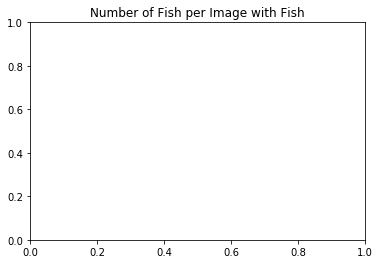

In [7]:
fig1, ax1 = plt.subplots()
ax1.set_title('Number of Fish per Image with Fish')
ax1.boxplot([i for i in number_of_fish_per_image if i != 0])#, showfliers=False)

plt.savefig("number_fish_per_image_with_fish.png")

##########################################################################################
fig1, ax1 = plt.subplots()
ax1.set_title('Number of Fish per Image')
ax1.boxplot(number_of_fish_per_image)#, showfliers=False)

plt.savefig("number_fish_per_image.png")

### Create label files for fish only

In [44]:
# search for all images that contain fish only

# train_labels_animals
# train_labels_no_animals
# test_labels

fish_id = [0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

fish_entries_train = []
for entry in train_labels_animals:
    for animal in entry['animals']:
        if fish_id == animal['group']:
            fish_entries_train.append(entry)
            break

fish_entries_test = []
for entry in test_labels:
    for animal in entry['animals']:
        if fish_id == animal['group']:
            fish_entries_test.append(entry)
            break

### Timos data

In [30]:
import h5py
path = "G:/Universität/UniBremen/Semester4/Data/maritime_dataset/labels.h5"

In [31]:
with h5py.File(path, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    keys = list(f.keys())

    # Get the data
    test_labels = list(f[keys[0]])
    training_labels_animals = list(f[keys[1]])
    training_labels_no_animals = list(f[keys[2]])

Keys: <KeysViewHDF5 ['test_labels', 'training_labels_animals', 'training_labels_no_animals']>


In [32]:
print(len(test_labels))
print(len(training_labels_animals))
print(len(training_labels_no_animals))

983
1452
7401


In [33]:
def print_animal_info(labelimg):
    vimg = labelimg[:, :, [-4,-3,-2,-1]].astype(np.int) # just take the vector data
    
    positions_front = []
    positions_back = []
    groups = []

    scaling = 32
    s_size = 16

    for x in range(vimg.shape[0]):
        for y in range(vimg.shape[1]):
            if vimg[x, y][0] != 0 or vimg[x, y][1] != 0 and vimg[x, y][2] != 0 or vimg[x, y][3] != 0:
                pos_front_x, pos_front_y = (y * scaling) + s_size, (x * scaling) + s_size
                pos_back_x, pos_back_y = (y * scaling) + s_size, (x * scaling) + s_size

                x_pos_f = pos_front_x + vimg[x, y][0]
                y_pos_f = pos_front_y + vimg[x, y][1]
                x_pos_b = pos_back_x + vimg[x, y][2]
                y_pos_b = pos_back_y + vimg[x, y][3]

                if [x_pos_f, y_pos_f] not in positions_front and [x_pos_b, y_pos_b] not in positions_back: 
                    positions_front.append([x_pos_f, y_pos_f])
                    positions_back.append([x_pos_b, y_pos_b])
                    groups.append(labelimg[x,y,0:6])
                    
#     print(positions_front)
#     print(positions_back)
#     print(groups)
    return positions_front, positions_back, groups

In [34]:
data = training_labels_animals

fish = 0
crust = 0
chaet = 0
unidentified = 0
jellyfish = 0
nothing = 0

for entry in data:
    pos_f, pos_b, groups = print_animal_info(entry)
    
    for g in groups:
        if np.array_equal(g, np.array([0,1,0,0,0,0])): fish+=1
        elif np.array_equal(g, np.array([0,0,1,0,0,0])): crust+=1
        elif np.array_equal(g, np.array([0,0,0,1,0,0])): chaet+=1
        elif np.array_equal(g, np.array([0,0,0,0,1,0])): unidentified+=1
        elif np.array_equal(g, np.array([0,0,0,0,0,1])): jellyfish+=1
        elif np.array_equal(g, np.array([1,0,0,0,0,0])): nothing+=1
            
print(f"Fish: {fish}\nCrustacea: {crust}\nChaetognatha: {chaet}\nUnidentified: {unidentified}\nJellyfish: {jellyfish}\nNothing: {nothing}")

Fish: 1786
Crustacea: 1593
Chaetognatha: 113
Unidentified: 72
Jellyfish: 102
Nothing: 0


In [48]:
# extract group and position from Timo's data
import json

json_file = []
json_file_2 = []

# iterate over all labels from training_data_animals
for i in range(len(training_labels_animals)):
#for i in range(1):
    #print(str(i))
    img_path = "G:/Universität/UniBremen/Semester4/Data/maritime_dataset/training_data_animals/"+str(i)+".jpg"
    img_path = "G:/Universität/UniBremen/Semester4/Data/maritime_dataset/test_data/"+str(i)+".jpg"
    #img_path = "../data/maritime_dataset/training_data_no_animals/"+str(i)+".jpg"
   
    pos_f, pos_b, groups = print_animal_info(training_labels_animals[i])
    
    animal_list = []
    animal_list_2 = []
    for j in range(len(groups)): 
        #print(groups[j])
        
        group1 = []
        group2 = []
        
        if groups[j].tolist().index(1) == 0: group1 = [1,0,0,0,0,0,0,0,0,0,0]; group2 =  [1,0,0,0,0,0,0,0,0,0,0]; print(f"zeroooooooooooooooooooooooo at {i}\n groups\n{groups}\nfront\n{pos_f}\nback\nback\n{pos_b}")
        elif groups[j].tolist().index(1) == 1: group1 = [0,1,0,0,0,0,0,0,0,0,0]; group2 = [0,0,1,0,0,0,0,0,0,0,0]
        elif groups[j].tolist().index(1) == 2: group1 = [0,0,0,1,0,0,0,0,0,0,0]; group2 = [0,0,0,0,1,0,0,0,0,0,0]
        elif groups[j].tolist().index(1) == 3: group1 = [0,0,0,0,0,1,0,0,0,0,0]; group2 = [0,0,0,0,0,0,1,0,0,0,0]
        elif groups[j].tolist().index(1) == 4: group1 = [0,0,0,0,0,0,0,1,0,0,0]; group2 = [0,0,0,0,0,0,0,0,1,0,0]
        elif groups[j].tolist().index(1) == 5: group1 = [0,0,0,0,0,0,0,0,0,1,0]; group2 = [0,0,0,0,0,0,0,0,0,0,1]
        
        temp1 = {}
        temp1["group"] = group1
        temp1["position"] = [int(s) for s in  pos_f[j]] 
        
        temp2 = {}
        temp2["group"] = group2
        temp2["position"] = [int(s) for s in pos_b[j]] 
        
#         temp3 = {}
#         temp3["head_group"] = group1
#         temp3["tail_group"] = group2
#         temp3["head_pos"] = [int(s) for s in  pos_f[j]] 
#         temp3["tail_pos"] = [int(s) for s in pos_b[j]] 
        
#         animal_list_2.append(temp3)
        
        animal_list.append(temp1)
        animal_list.append(temp2)
    
    obj={}
    obj["filename"] = img_path
    obj["animals"] = animal_list
    
    json_file.append(obj)
    
    
#     obj={}
#     obj["filename"] = img_path
#     obj["animals"] = animal_list_2
    
#     json_file_2.append(obj)

zeroooooooooooooooooooooooo at 484
 groups
[array([0., 0., 0., 0., 1., 0.], dtype=float32), array([0., 0., 0., 0., 1., 0.], dtype=float32), array([0., 0., 0., 0., 1., 0.], dtype=float32), array([0., 0., 0., 0., 1., 0.], dtype=float32), array([0., 0., 0., 0., 1., 0.], dtype=float32), array([0., 0., 0., 0., 1., 0.], dtype=float32), array([0., 0., 0., 0., 1., 0.], dtype=float32), array([1., 0., 0., 0., 1., 0.], dtype=float32), array([0., 0., 0., 0., 1., 0.], dtype=float32)]
front
[[23, 610], [21, 863], [605, 784], [23, 642], [21, 895], [23, 674], [21, 927], [23, 706], [21, 959]]
back
back
[[4253, 508], [4264, 672], [3987, 544], [4253, 540], [4264, 704], [4253, 572], [4264, 736], [4253, 604], [4264, 768]]


In [49]:
# index 484 is zero?
with open('test_labels_2.json', 'w') as f:
    json.dump(json_file_2, f)

In [51]:
print(json_file_2[0])

{'filename': 'G:/Universität/UniBremen/Semester4/Data/maritime_dataset/test_data/0.jpg', 'animals': [{'head_group': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'tail_group': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 'head_pos': [1144, 942], 'tail_pos': [874, 785]}, {'head_group': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'tail_group': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 'head_pos': [834, 1571], 'tail_pos': [941, 1432]}, {'head_group': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'tail_group': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 'head_pos': [3780, 1474], 'tail_pos': [3479, 1564]}, {'head_group': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'tail_group': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 'head_pos': [1867, 1714], 'tail_pos': [1690, 1664]}, {'head_group': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'tail_group': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 'head_pos': [2336, 2390], 'tail_pos': [2422, 2042]}]}


In [ ]:
# index 484 is zero?
with open('training_labels_animals.json', 'w') as f:
    json.dump(json_file, f)

### Correct entry 484 in my label files

In [50]:
# define the correct animal list
pos_f = [[23, 610], [21, 863], [605, 784], [23, 642], [21, 895], [23, 674], [21, 927], [23, 706], [21, 959]]
pos_b = [[4253, 508], [4264, 672], [3987, 544], [4253, 540], [4264, 704], [4253, 572], [4264, 736], [4253, 604], [4264, 768]]
groups = [np.array([0., 0., 0., 0., 1., 0.]), np.array([0., 0., 0., 0., 1., 0.]), np.array([0., 0., 0., 0., 1., 0.]), np.array([0., 0., 0., 0., 1., 0.]), np.array([0., 0., 0., 0., 1., 0.]), np.array([0., 0., 0., 0., 1., 0.]), np.array([0., 0., 0., 0., 1., 0.]), np.array([0., 0., 0., 0., 1., 0.]), np.array([0., 0., 0., 0., 1., 0.])]

animal_list = []
for j in range(len(groups)): 
    #print(groups[j])

    group1 = []
    group2 = []

    if groups[j].tolist().index(1) == 0: group1 = [1,0,0,0,0,0,0,0,0,0,0]; group2 =  [1,0,0,0,0,0,0,0,0,0,0]; print(f"zeroooooooooooooooooooooooo at {i}\n groups\n{groups}\nfront\n{pos_f}\nback\nback\n{pos_b}")
    elif groups[j].tolist().index(1) == 1: group1 = [0,1,0,0,0,0,0,0,0,0,0]; group2 = [0,0,1,0,0,0,0,0,0,0,0]
    elif groups[j].tolist().index(1) == 2: group1 = [0,0,0,1,0,0,0,0,0,0,0]; group2 = [0,0,0,0,1,0,0,0,0,0,0]
    elif groups[j].tolist().index(1) == 3: group1 = [0,0,0,0,0,1,0,0,0,0,0]; group2 = [0,0,0,0,0,0,1,0,0,0,0]
    elif groups[j].tolist().index(1) == 4: group1 = [0,0,0,0,0,0,0,1,0,0,0]; group2 = [0,0,0,0,0,0,0,0,1,0,0]
    elif groups[j].tolist().index(1) == 5: group1 = [0,0,0,0,0,0,0,0,0,1,0]; group2 = [0,0,0,0,0,0,0,0,0,0,1]

    temp1 = {}
    temp1["group"] = group1
    temp1["position"] = [int(s) for s in  pos_f[j]] 

    temp2 = {}
    temp2["group"] = group2
    temp2["position"] = [int(s) for s in pos_b[j]] 

    animal_list.append(temp1)
    animal_list.append(temp2)


print(animal_list)

[{'group': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 'position': [23, 610]}, {'group': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 'position': [4253, 508]}, {'group': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 'position': [21, 863]}, {'group': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 'position': [4264, 672]}, {'group': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 'position': [605, 784]}, {'group': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 'position': [3987, 544]}, {'group': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 'position': [23, 642]}, {'group': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 'position': [4253, 540]}, {'group': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 'position': [21, 895]}, {'group': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 'position': [4264, 704]}, {'group': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 'position': [23, 674]}, {'group': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 'position': [4253, 572]}, {'group': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 'position': [21, 927]}, {'group': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 'position': [4264, 736]}, {'group': [0, 0, 0

In [ ]:
# load all files to be updated
#img = "G:/Universität/UniBremen/Semester4/Data/maritime_dataset/training_data_animals/484.jpg"
#img = "G:/Universität/UniBremen/Semester4/Data/maritime_dataset_25/training_data_animals/484.jpg"
#img = "../data/maritime_dataset/training_data_animals/484.jpg"
img = "../data/maritime_dataset_25/training_data_animals/484.jpg"

labels_g = "../data/maritime_dataset/labels/training_labels_animals.json"
labels_g_25 = "../data/maritime_dataset_25/labels/training_labels_animals.json"

labels = "../data/maritime_dataset/labels/normal/training_labels_animals.json"
labels_25 = "../data/maritime_dataset_25/labels/normal/training_labels_animals.json"

with open(labels_g , 'r') as f:
    g1 = json.load(f)
    
with open(labels_g_25 , 'r') as f:
    g2 = json.load(f)
    
with open(labels , 'r') as f:
    a1 = json.load(f)
    
with open(labels_25, 'r') as f:
    a2 = json.load(f)

In [ ]:
# update dict entry
file = a2

for entry in file:
    if entry['filename'] == img:
        print(entry)
        print(len(entry['animals']))
        
        entry['animals'] = animal_list
        print(entry)
        print(len(entry['animals']))

In [ ]:
# save updated training_labels file
with open('training_labels_animals.json', 'w') as f:
    json.dump(file, f)